<a href="https://colab.research.google.com/github/BDouchet/SDATA/blob/main/TP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

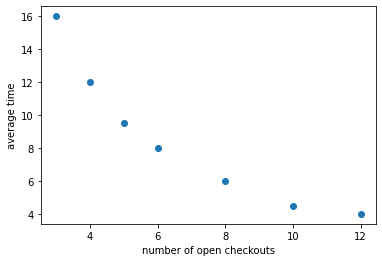

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x=np.array([3,4,5,6,8,10,12])
y=np.array([16,12,9.5,8,6,4.5,4])

plt.scatter(x,y)
plt.xlabel('number of open checkouts')
plt.ylabel('average time')
plt.show()

In [ ]:
print('x_mean : '+ str(x.mean()))
print('x_std : '+ str(x.std()))
print()
print('y_mean : '+ str(y.mean()))
print('y_std : '+ str(y.std()))
print()
print('covariance : '+str(np.cov(x,y)[0,1]))
print('correlation : '+str(np.corrcoef(x,y)[0,1]))

x_mean : 6.857142857142857
x_std : 3.0438965360946453

y_mean : 8.571428571428571
y_std : 4.003824702069005

covariance : -13.154761904761905
correlation : -0.9251907056246451


# linear regression

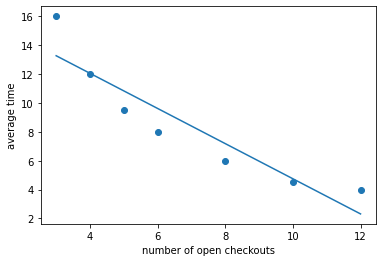

In [ ]:
cov_mat=np.cov(x,y)
b1hat=cov_mat[0,1]/cov_mat[0,0]
b0hat=y.mean()-b1hat*x.mean()

yhat=np.array([b0hat+b1hat*x_i for x_i in x])

plt.scatter(x,y)
plt.plot(x,yhat)
plt.xlabel('number of open checkouts')
plt.ylabel('average time')
plt.show()

In [ ]:
X=np.stack((np.ones(x.shape[0]),x),axis=1)
Y=y[:,np.newaxis]

Bhat=np.linalg.inv(X.T @ X) @ X.T @ Y

print(Bhat)
print(b0hat,b1hat)

[[16.91629956]
 [-1.21696035]]
16.91629955947137 -1.2169603524229078


In [ ]:
def estimator(x):
    return Bhat[0][0]+Bhat[1][0]*x

print(estimator(1),estimator(7), estimator(20))

15.69933920704846 8.397577092511009 -7.422907488986805


# Polynomial Regression

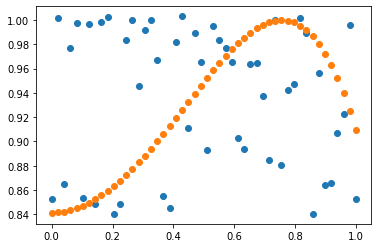

In [ ]:
import math
def generateXY():
    X=np.random.uniform(0,1,50)
    epsilon=np.random.normal(0,0.002,50)
    Y=np.array([math.sin(1+x**2)+eps for x,eps in zip(X,epsilon)])
    return X,Y
X,Y=generateXY()

X_eq=np.linspace(0,1,50)
sinX=np.array([math.sin(1+x**2) for x in X_eq])

plt.scatter(X_eq,Y)
plt.scatter(X_eq,sinX)
plt.show()


In [ ]:
def get_beta(m):
    XX=np.expand_dims(np.ones(X.shape[0]),axis=1)
    for i in range(1,m+1):
        XX=np.concatenate((XX,np.expand_dims(np.power(X,i),axis=1)),axis=1)
    YY=Y[:,np.newaxis]
    Bhat=np.linalg.inv(XX.T @ XX) @ XX.T @ YY
    return Bhat


In [ ]:
def get_yhat(X,m):
    out=[]
    beta=get_beta(m)
    for x in X:
        sum=0
        for i in range(m+1):
            sum+=beta[i]*(x**i)
        out.append(sum)
    return np.array(out)


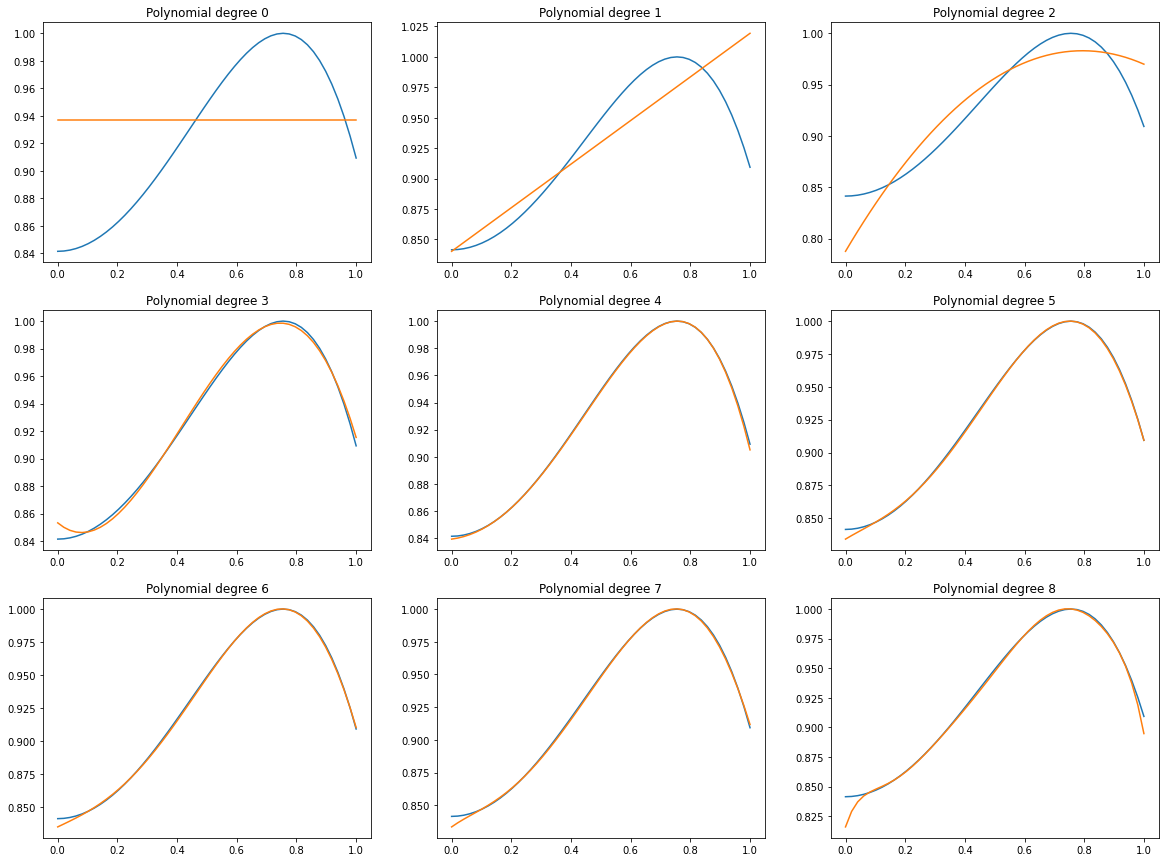

In [ ]:
_,axs=plt.subplots(nrows=3,ncols=3,figsize=(20,15))
for i,ax in enumerate(axs.flatten()):
    #plt.sca(ax)
    ax.plot(X_eq,sinX)
    ax.plot(X_eq,get_yhat(X_eq,i))
    ax.set_title('Polynomial degree '+str(i))
plt.show()

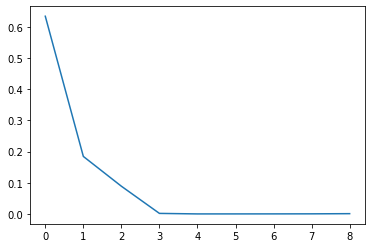

In [ ]:
from sklearn.metrics import mean_squared_error

metrics=np.zeros(9)
for epoch in range(200):
    X,Y=generateXY()
    for m in range(9):
        Yhat=get_yhat(X_eq,m)
        metrics[m]+=mean_squared_error(sinX,Yhat)
plt.plot(np.arange(9),metrics)
plt.annotate()
plt.show()        